<div align="center">

# Centro Latinoamericano de Excelencia en Cambio Climático y Salud de la Universidad Peruana Cayetano Heredia 
    
</div>

<img src="clima.jpeg">

## Bonus
#### Datos publicos de Cambio Climatico : vamos a graficar lineas de la evolucion de calentamiento global

In [25]:
#Cargamos paquetes para cargar datos directos de un URL

from urllib.request import urlretrieve, urlopen
from html.parser import HTMLParser
from typing import Union, List, Tuple, Optional, Any

### Vamos a llamar datos en temperaturas superficiales desde la web de NOAA datos globales 

Vamos a traer datos grillados desde la web de NOAA

https://www.ncei.noaa.gov/data/noaa-global-surface-temperature/v5/access/gridded/NOAA_V5_air_temperature_anomaly.nc

In [27]:
# Vamos a llamar datos en temperaturas superficiales desde la web de NOAA datos globales 
 
URL: str = ('https://www.ncei.noaa.gov/'
            'data/noaa-global-surface-temperature/'
            'v5/access/gridded/')
FILENAME: str = 'NOAA_V5_air_temperature_anomaly.nc'
 
class MyParser(HTMLParser):
    def __init__(self, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)
        self.nc_files: List[str] = []
 
    def handle_starttag(
        self,
        tag: str,
        attrs: List[Any]
    ) -> None:
        if tag == "a":
            # Check the list of defined attributes.
            for name, value in attrs:
                if name and value and name == "href" and value.endswith('.nc'):                    
                    self.nc_files.append(value)

#Contruimos una funcion para hacer la descarga directa de los datos 
 
def download_noaa(url: str, filename: str) -> None:
    """Get version 5 of NOAA air temperature anomaly.
 
    Parameters
    ----------
    url : str
        Url of the site:         
        https://www.ncei.noaa.gov/data/noaa-global-surface-temperature/v5/access/gridded/. 
    filename : str
        The filename to be used to name the downloaded file.
 
    Returns
    -------
    None. 
    """
    html = urlopen(url).read()
    parser = MyParser() 
    parser.feed(str(html))
    _filename = parser.nc_files[-1]
    urlretrieve(url + _filename, filename)

### En este bloque vamos a a leer los datos con Xarray y manejarlos en pandas, asimismo la función nos va trasformar la data en un serie de tiempo

In [28]:
import xarray as xr
import pandas as pd
 
def read_noaa(filename: str) -> xr.Dataset:
    """Read the netCDF file downloaded using `download_noaa`.
 
    Parameters
    ----------
    filename : str
        The name of the file to read as `xarray.Dataset`
 
    Returns
    -------
    `xarray.Dataset`
    """
    return xr.open_dataset(filename)
 
def get_noaa_timeseries(
        xarr: xr.Dataset, 
        lon: Union[int, float], 
        lat: Union[int, float]
    ) -> xr.Dataset:
    """Get the annual temperature anomaly time series from NOAA data.
 
    Parameters
    ----------
    xarr : xr.Dataset
        `xarray.Dataset` containing the monthly anomalies.
    lon : Union[int, float]
        Longitude in decimal degrees. It will return the closest timeseries
        to this location.
    lat : Union[int, float]
        Latitude in decimal degrees. It will return the closest timeseries
        to this location.
 
    Returns
    -------
    `xarray.Dataset`.
    """
    data = xarr.sel(lon=lon, lat=lat, z=0, method='nearest')
    df = data.to_dataframe()['anom']
    ts = df * df.index.days_in_month
    ts = (     
        ts.groupby(pd.Grouper(freq='Y')).mean()      
        /      
        ts.groupby(pd.Grouper(freq='Y')).count() 
    )
    return ts

### En este ultimo bloque se va construir una funcion que nos grafique nuestras warming stripes en un punto determinado del planeta

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
 
def plot_noaa(
        xarr: xr.Dataset,
        lon: Union[int, float],
        lat: Union[int, float]
    ) -> None:
    lon = float(lon)
    lat = float(lat)
    ts = get_noaa_timeseries(xarr, lon, lat)
    # warming stripes adapted from https://towardsdatascience.com/climate-heatmaps-made-easy-6ec5be0be6ff
    fig, ax = plt.subplots(figsize=(12, 10))
    sns.heatmap(
        data=ts.values[np.newaxis,:],
        ax=ax,
        cmap='seismic',
        cbar=False,
        vmin=ts.min(),
        vmax=ts.max(),
        center=0.,
        xticklabels=False, 
        yticklabels=False,
    )
    fig.tight_layout()
    #fig.savefig("warming_stripes_lima.png")

### Manos en la Masa

<img src="manos_masa.jpeg">

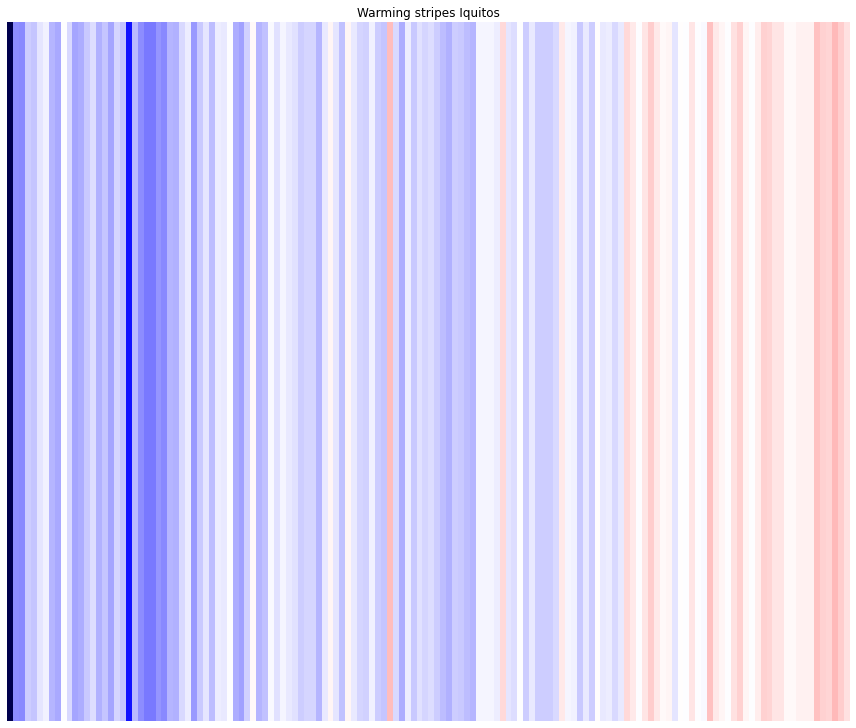

In [43]:
download_noaa(URL, FILENAME)
xarr = read_noaa(FILENAME)
#(longitud, latitud)
plot_noaa(xarr, -73.2 , -3.74)
plt.title('Warming stripes Iquitos',loc='center')
plt.savefig("Warming stripes Iquitos.png")

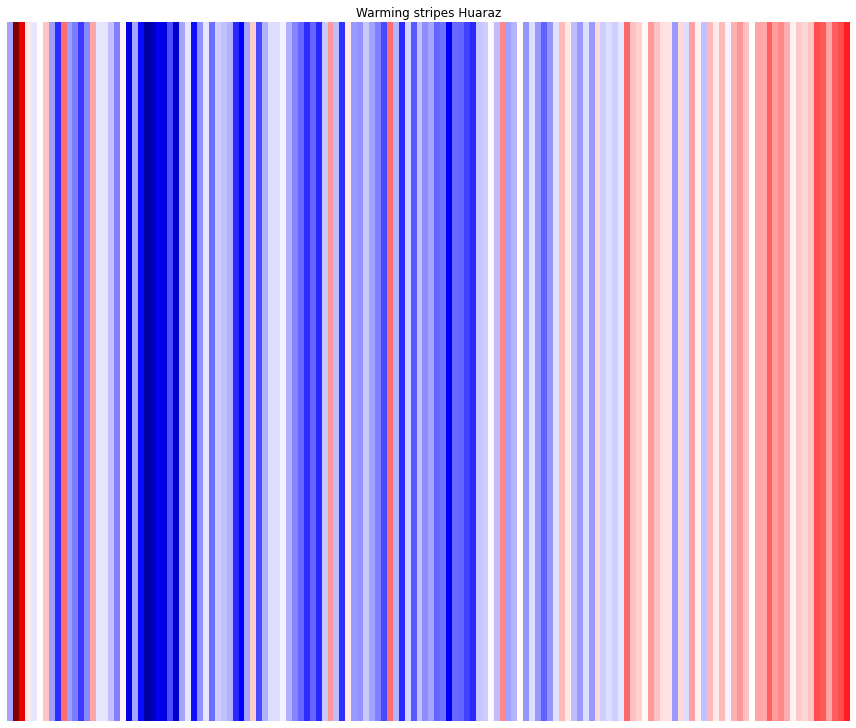

In [41]:
download_noaa(URL, FILENAME)
xarr = read_noaa(FILENAME)
#(longitud, latitud)
plot_noaa(xarr, -77.52 , -9.52)
plt.title('Warming stripes Huaraz', loc='center')
plt.savefig("Warming stripes Huaraz.png")

<div align="center">

# CAMBIO CLIMATICO ES REAL!!
    
</div>

<img src="climatechange.png">